# Instalacion de dependencias

In [ ]:
!pip install transformers torch
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

# Descargar modelo

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Nombre del modelo en Hugging Face
model_name = "ealvaradob/bert-finetuned-phishing"

# Cargar el tokenizador y el modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Enviar el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/845 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1

# Realizar pregunta

In [ ]:
def classify_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Mover a GPU si es necesario

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1).cpu().numpy()[0]

    # Definir etiquetas (ajusta según el modelo)
    labels = ["No Phishing", "Phishing"]

    predicted_class = int(torch.argmax(logits, dim=-1).item())
    predicted_label = labels[predicted_class]

    return predicted_label, probabilities

# Texto de prueba 1: Posible phishing
text = "Your account has been suspended due to suspicious activity. Click here to verify your identity immediately: http://fake-login.com"
predicted_label, probabilities = classify_text(text)

print(f"Predicción: {predicted_label}")
print(f"Confianza: No Phishing: {probabilities[0]:.4f}, Phishing: {probabilities[1]:.4f}")

# Texto de prueba 2: Email legítimo
text = "Dear customer, We hope you enjoy your visit."
predicted_label, probabilities = classify_text(text)

print(f"Predicción: {predicted_label}")
print(f"Confianza: No Phishing: {probabilities[0]:.4f}, Phishing: {probabilities[1]:.4f}")



Predicción: Phishing
Confianza: No Phishing: 0.0000, Phishing: 1.0000
Predicción: No Phishing
Confianza: No Phishing: 0.9998, Phishing: 0.0002


# Prueba con dataset de kaggle

In [ ]:
import os
# IR A ESTE ENLACE Y DESCARGAR LA API_KEY https://www.kaggle.com/settings
# LA LLAVE ESTA EN FROMATO JSON, LA SUBEN A COLAB
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d naserabdullahalam/phishing-email-dataset
!unzip phishing-email-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset
License(s): CC-BY-SA-4.0
Archive:  phishing-email-dataset.zip
  inflating: CEAS_08.csv             
  inflating: Enron.csv               
  inflating: Ling.csv                
  inflating: Nazario.csv             
  inflating: Nigerian_Fraud.csv      
  inflating: SpamAssasin.csv         
  inflating: phishing_email.csv      


## Testeo del modelo haciendo uso del dataset descargado en texto

### CEAS_08 csv

label
1    21842
0    17312
Name: count, dtype: int64
Buck up, your troubles caused by small dimension will soon be over!
Become a lover no woman will be able to resist!
http://whitedone.com/


come. Even as Nazi tanks were rolling down the streets, the dreamersphilosopher or a journalist. He was still not sure.I do the same.

Procesados: 2000/10000 - Precisión parcial: 0.8625
TP: 860 | FP: 44 | TN: 865 | FN: 231
--------------------------------------------------

Procesados: 4000/10000 - Precisión parcial: 0.8640
TP: 900 | FP: 45 | TN: 828 | FN: 227
--------------------------------------------------

Procesados: 6000/10000 - Precisión parcial: 0.8645
TP: 878 | FP: 58 | TN: 851 | FN: 213
--------------------------------------------------

Procesados: 8000/10000 - Precisión parcial: 0.8620
TP: 915 | FP: 52 | TN: 809 | FN: 224
--------------------------------------------------

Procesados: 10000/10000 - Precisión parcial: 0.8720
TP: 901 | FP: 43 | TN: 843 | FN: 213
----------------------

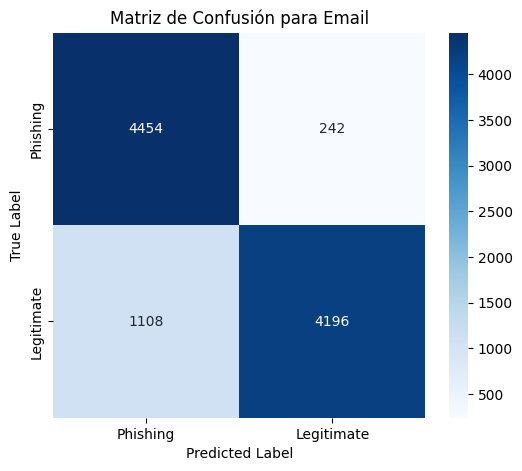

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
df = pd.read_csv("CEAS_08.csv")

print(df["label"].value_counts())  # Distribución de clases

#Mostrar el primer correo disponible
print(df["body"][0])

# Seleccionar 10,000 correos aleatorios del dataset
df_sample = df.sample(n=10000, random_state=42)

# Obtener etiquetas reales
true_labels = df_sample["label"].tolist()  # 1 = Phishing, 0 = No Phishing

predicted_labels = []
batch_size = 2000  # Mostrar log cada 1000 correos

# Evaluar el modelo en cada texto
for i, text in enumerate(df_sample["body"]):
    predicted_label = classify_text(text)[0]
    predicted_labels.append(predicted_label)

    # Mostrar logs cada 1000 correos
    if (i + 1) % batch_size == 0 or (i + 1) == len(df_sample):
        predicted_numeric = [1 if label == "Phishing" else 0 for label in predicted_labels[-batch_size:]]
        true_numeric = true_labels[i + 1 - batch_size: i + 1]

        # Calcular métricas de rendimiento
        accuracy = accuracy_score(true_numeric, predicted_numeric)
        tn, fp, fn, tp = confusion_matrix(true_numeric, predicted_numeric).ravel()

        print(f"\nProcesados: {i + 1}/{len(df_sample)} - Precisión parcial: {accuracy:.4f}")
        print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")
        print("-" * 50)

# Calcular matriz de confusión

# Calcular precisión final
predicted_numeric = [1 if label == "Phishing" else 0 for label in predicted_labels]
accuracy = accuracy_score(true_labels, predicted_numeric)
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_numeric).ravel()

print(f"\nPrecisión final en el dataset de 10,000 correos: {accuracy:.4f}")
print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")

conf_matrix = [[tp, fp], [fn, tn]]

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Phishing", "Legitimate"], yticklabels=["Phishing", "Legitimate"])

# Agregar títulos y etiquetas
plt.title("Matriz de Confusión para Email")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Mostrar la gráfica
plt.show()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64
http://www.crestonwood.com/router.php

Procesados: 2000/10000 - Precisión parcial: 0.8925
TP: 946 | FP: 171 | TN: 839 | FN: 44
--------------------------------------------------

Procesados: 4000/10000 - Precisión parcial: 0.8925
TP: 951 | FP: 166 | TN: 834 | FN: 49
--------------------------------------------------

Procesados: 6000/10000 - Precisión parcial: 0.9065
TP: 955 | FP: 131 | TN: 858 | FN: 56
--------------------------------------------------

Procesados: 8000/10000 - Precisión parcial: 0.8865
TP: 959 | FP: 161 | TN: 814 | FN: 66
--------------------------------------------------

Procesados: 10000/10000 - Precisión parcial: 0.8805
TP: 948 | FP: 182 | TN: 813 | FN: 57
--------------------------------------------------

Precisión final en el dataset de 10,000 urls: 0.8917
TP: 4759 | FP: 811 | TN: 4158 | FN: 272


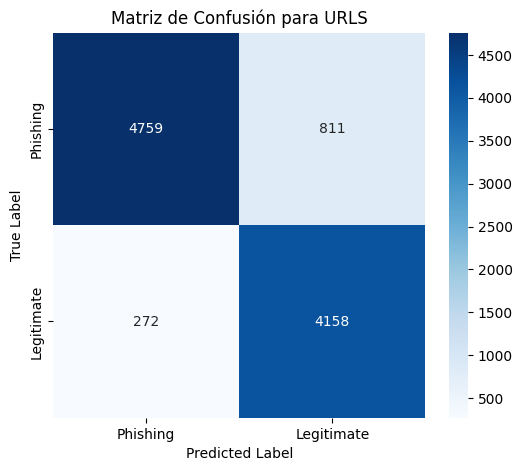

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el archivo CSV
df = pd.read_csv("dataset_phishing.csv")

# Ver distribución de clases
print(df["status"].value_counts())

# Mostrar la primera URL disponible
print(df["url"].iloc[0])

# Seleccionar 10,000 URLs aleatorias del dataset
df_sample = df.sample(n=10000, random_state=42)

# Obtener etiquetas reales (0 = legitimate, 1 = phishing)
true_labels = df_sample["status"].apply(lambda x: 1 if x.lower() == "phishing" else 0).tolist()

predicted_labels = []
batch_size = 2000  # Mostrar log cada 1000 URLs

# Evaluar el modelo en cada URL
for i, url in enumerate(df_sample["url"]):
    predicted_label = classify_text(url)[0]  # Asumimos que classify_text devuelve "phishing" o "legitimate"

    # Convertir a 0 o 1
    # predicted_numeric = 1 if predicted_label.lower() == "phishing" else 0
    predicted_labels.append(predicted_label)

    # Obtener etiqueta real
    real_label = "phishing" if true_labels[i] == 1 else "legitimate"

    # Mostrar la predicción junto con la etiqueta real
    # print(f"URL: {url} | Predicted Label: {predicted_label} | Real Label: {real_label}")

    # Mostrar logs cada 1000 correos
    if (i + 1) % batch_size == 0 or (i + 1) == len(df_sample):
        predicted_numeric = [1 if label == "Phishing" else 0 for label in predicted_labels[-batch_size:]]
        true_numeric = true_labels[i + 1 - batch_size: i + 1]

        # Calcular métricas de rendimiento
        accuracy = accuracy_score(true_numeric, predicted_numeric)
        tn, fp, fn, tp = confusion_matrix(true_numeric, predicted_numeric).ravel()

        print(f"\nProcesados: {i + 1}/{len(df_sample)} - Precisión parcial: {accuracy:.4f}")
        print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")
        print("-" * 50)

# Calcular precisión final
predicted_numeric = [1 if label == "Phishing" else 0 for label in predicted_labels]
accuracy = accuracy_score(true_labels, predicted_numeric)
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_numeric).ravel()

print(f"\nPrecisión final en el dataset de 10,000 urls: {accuracy:.4f}")
print(f"TP: {tp} | FP: {fp} | TN: {tn} | FN: {fn}")

conf_matrix = [[tp, fp], [fn, tn]]

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Phishing", "Legitimate"], yticklabels=["Phishing", "Legitimate"])

# Agregar títulos y etiquetas
plt.title("Matriz de Confusión para URLS")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Mostrar la gráfica
plt.show()


In [ ]:
print(classify_text("http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4"))
print(classify_text("https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_"))
print(classify_text("http://www.crestonwood.com/router.php"))


('Phishing', array([3.8907878e-05, 9.9996114e-01], dtype=float32))
('Phishing', array([7.1698937e-06, 9.9999285e-01], dtype=float32))
('No Phishing', array([9.9999046e-01, 9.5283840e-06], dtype=float32))
